<a href="https://colab.research.google.com/github/Spyrx4/analisis_sentimen_merahputih_oneforall/blob/main/notebook/Proses_data_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [315]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import re
import string
import nltk
import html
import warnings
warnings.filterwarnings('ignore')

In [316]:
df = pd.read_csv('../data/smerahputih_oneforall.csv')

In [317]:
df.head()

,publishedAt,authorDisplayName,textDisplay,likeCount,type
0,2025-08-28T08:45:34Z,@SyafeQah1990,Cartoon ni masuk pawagam...??..,0,comment
1,2025-08-28T08:29:35Z,@HusnaNurul-m6h,ini yg katanya film mengeluarkan dan sampe mil...,0,comment
2,2025-08-28T08:14:10Z,@AlvinoAWP,Burung.nya.suara.monyet.cok🗿🗿,0,comment
3,2025-08-28T07:56:15Z,@arkanpradipta8934,"<a href=""https://www.youtube.com/watch?v=6jdG2...",0,comment
4,2025-08-28T07:50:36Z,@galangadimaskhrisnaherlamb4053,bahkan jurasik park 1993 lebih bagus dari ini,1,comment


In [318]:
df

,publishedAt,authorDisplayName,textDisplay,likeCount,type
0,2025-08-28T08:45:34Z,@SyafeQah1990,Cartoon ni masuk pawagam...??..,0,comment
1,2025-08-28T08:29:35Z,@HusnaNurul-m6h,ini yg katanya film mengeluarkan dan sampe mil...,0,comment
2,2025-08-28T08:14:10Z,@AlvinoAWP,Burung.nya.suara.monyet.cok🗿🗿,0,comment
3,2025-08-28T07:56:15Z,@arkanpradipta8934,"<a href=""https://www.youtube.com/watch?v=6jdG2...",0,comment
4,2025-08-28T07:50:36Z,@galangadimaskhrisnaherlamb4053,bahkan jurasik park 1993 lebih bagus dari ini,1,comment
...,...,...,...,...,...
4751,2025-08-11T08:57:24Z,@prod.starlight,​@@JustAnOrd1naryMankok XXI gaada trailer sih?...,6,reply
4752,2025-08-15T09:15:28Z,@dikaalvin657,Kalau fulus<br>Pasti mulus<br>😂😂😂,2,reply
4753,2025-08-15T23:23:43Z,@matthewbrealey2026,@@prod.starlight masuk di XXI loh,0,reply
4754,2025-08-09T04:07:03Z,@robbycarnando4512,Pengisi suara ny spa aj yahhh...,1,comment


In [319]:
df['publishedAt'] = pd.to_datetime(df['publishedAt'])


# Pisahkan menjadi dua kolom: tanggal dan waktu
df['tanggal'] = df['publishedAt'].dt.date
df['jam'] = df['publishedAt'].dt.time

In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4756 entries, 0 to 4755
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   publishedAt        4756 non-null   datetime64[ns, UTC]
 1   authorDisplayName  4756 non-null   object             
 2   textDisplay        4756 non-null   object             
 3   likeCount          4756 non-null   int64              
 4   type               4756 non-null   object             
 5   tanggal            4756 non-null   object             
 6   jam                4756 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(1), object(5)
memory usage: 260.2+ KB


In [321]:
# clean data kolom authordisplayname
def clean_text(name):
    name = re.sub(r'^@', '', name)
    name = name.lower()
    return name

In [322]:
df['username'] = df['authorDisplayName'].apply(clean_text)

In [323]:
df  = pd.DataFrame(df[['tanggal','jam','username','textDisplay','likeCount']])

In [324]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4756 entries, 0 to 4755
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tanggal      4756 non-null   object
 1   jam          4756 non-null   object
 2   username     4756 non-null   object
 3   textDisplay  4756 non-null   object
 4   likeCount    4756 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 185.9+ KB


In [325]:
# melihat data duplicate
df[df.duplicated(subset='textDisplay')]

,tanggal,jam,username,textDisplay,likeCount
47,2025-08-27,14:08:06,yoiki_kolip,Bajet miliarran grafik 80 an,0
234,2025-08-25,14:38:04,kutufilem,itu mau peramg apa gimana kok ada ak47 di gudang,0
254,2025-08-25,12:24:33,viovirza,"<a href=""https://www.youtube.com/watch?v=6jdG2...",0
323,2025-08-24,21:22:28,juragangabah-m8b,👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎,0
407,2025-08-24,07:08:29,supplyoverload,Burik,0
...,...,...,...,...,...
4624,2025-08-11,06:20:58,iujenongg,"Bakalan abis tiket bioskop nya nanti, mengalah...",1
4635,2025-08-16,10:33:31,azkaalfaizi-d4n,😂😂,0
4645,2025-08-10,05:28:21,dutsukodutsu6117,😂😂😂😂,0
4660,2025-08-09,23:18:36,agegabut,Wtf,0


In [326]:
df.drop_duplicates(subset ="textDisplay", keep = 'first', inplace=True)

In [327]:
df.duplicated().sum()

np.int64(0)

In [328]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4640 entries, 0 to 4755
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tanggal      4640 non-null   object
 1   jam          4640 non-null   object
 2   username     4640 non-null   object
 3   textDisplay  4640 non-null   object
 4   likeCount    4640 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 217.5+ KB


In [329]:
# mencari apakah ada data kosong
df.isnull().sum()

tanggal        0
jam            0
username       0
textDisplay    0
likeCount      0
dtype: int64

In [330]:
text = ' '.join(df['textDisplay'])

In [331]:
from collections import Counter

tokens = text.split()
word_counts = Counter(tokens)

In [332]:
top_words = word_counts.most_common(10)
word, count = zip(*top_words)

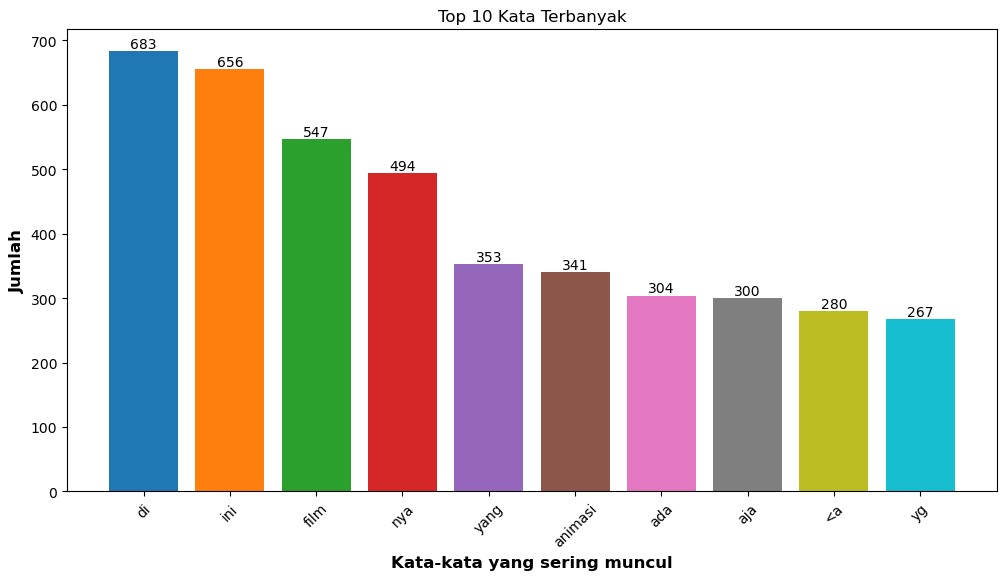

In [333]:
colors = plt.cm.tab10(range(len(word)))

plt.figure(figsize=(12, 6))
bars = plt.bar(word, count, color=colors)
plt.xlabel('Kata-kata yang sering muncul', fontsize=12, fontweight='bold')
plt.ylabel('Jumlah', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.title('Top 10 Kata Terbanyak')

for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(num), ha='center', va='bottom', fontsize=10)

plt.show()

In [334]:
df

,tanggal,jam,username,textDisplay,likeCount
0,2025-08-28,08:45:34,syafeqah1990,Cartoon ni masuk pawagam...??..,0
1,2025-08-28,08:29:35,husnanurul-m6h,ini yg katanya film mengeluarkan dan sampe mil...,0
2,2025-08-28,08:14:10,alvinoawp,Burung.nya.suara.monyet.cok🗿🗿,0
3,2025-08-28,07:56:15,arkanpradipta8934,"<a href=""https://www.youtube.com/watch?v=6jdG2...",0
4,2025-08-28,07:50:36,galangadimaskhrisnaherlamb4053,bahkan jurasik park 1993 lebih bagus dari ini,1
...,...,...,...,...,...
4751,2025-08-11,08:57:24,prod.starlight,​@@JustAnOrd1naryMankok XXI gaada trailer sih?...,6
4752,2025-08-15,09:15:28,dikaalvin657,Kalau fulus<br>Pasti mulus<br>😂😂😂,2
4753,2025-08-15,23:23:43,matthewbrealey2026,@@prod.starlight masuk di XXI loh,0
4754,2025-08-09,04:07:03,robbycarnando4512,Pengisi suara ny spa aj yahhh...,1


In [335]:
def remove_html(tweet):
    if tweet is not None and isinstance(tweet, str):
        # hapus tag html
        html_pattern = re.compile(r'<.*?>')
        cleaned_tweet = html_pattern.sub(r'', tweet)

        # Langkah 2: Dekode entitas HTML (misalnya &quot; menjadi ")
        cleaned_tweet = html.unescape(cleaned_tweet)

        # Ganti tanda titik dengan spasi
        cleaned_tweet = cleaned_tweet.replace('.', ' ')

        # Hapus tanda baca lainnya
        punctuation_pattern = re.compile(f"[{re.escape(string.punctuation)}]")
        cleaned_tweet = punctuation_pattern.sub(r'', cleaned_tweet)

        return cleaned_tweet
    else:
        return tweet

In [336]:
# fungsi menghapus emoji
def remove_emoji(tweet):
    if tweet is not None and isinstance(tweet, str):
        emoji_pattern = re.compile(
            "["
            "\U0001F600-\U0001F64F"  # emoticons
            "\U0001F300-\U0001F5FF"  # symbols & pictographs
            "\U0001F680-\U0001F6FF"  # transport & map symbols
            "\U0001F700-\U0001F77F"  # alchemical symbols
            "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
            "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
            "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
            "\U0001FA00-\U0001FA6F"  # Chess Symbols
            "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
            "\U00002702-\U000027B0"  # Additional emoticons (Dingbats)
            "\U000024C2-\U0001F251"  # Miscellaneous Symbols and Pictographs
            "\U0001F1E0-\U0001F1FF"  # flags (iOS)
            "]+", flags=re.UNICODE)

        return emoji_pattern.sub(r'', tweet)
    else:
        return tweet

In [337]:
# fungsi menghapus simbol
def remove_symbols(tweet):
  if tweet is not None and isinstance(tweet, str):
      tweet = re.sub(r'[^a-zA-Z0-0\s]', ' ', tweet)
  return tweet

In [338]:
# fungsi menghapus angka
def remove_number(tweet):
  if tweet is not None and isinstance(tweet, str):
    tweet = re.sub(r'\d+', '', tweet)
  return tweet

In [339]:
# hapus hastag
def hapus_hastag(teks):
  return re.sub(r'#\w+', '', teks).strip()

In [340]:

df['komentarBaru'] = df['textDisplay'].apply(lambda x: remove_html(x))
df['komentarBaru'] = df['komentarBaru'].apply(lambda x: remove_emoji(x))
df['komentarBaru'] = df['komentarBaru'].apply(lambda x: remove_symbols(x))
df['komentarBaru'] = df['komentarBaru'].apply(lambda x: remove_number(x))
df['komentarBaru'] = df['komentarBaru'].apply(lambda x: hapus_hastag(x))
# df['komentarBaru'] = df['komentarBaru'].apply(remove_number)

df.head(10)

,tanggal,jam,username,textDisplay,likeCount,komentarBaru
0,2025-08-28,08:45:34,syafeqah1990,Cartoon ni masuk pawagam...??..,0,Cartoon ni masuk pawagam
1,2025-08-28,08:29:35,husnanurul-m6h,ini yg katanya film mengeluarkan dan sampe mil...,0,ini yg katanya film mengeluarkan dan sampe mil...
2,2025-08-28,08:14:10,alvinoawp,Burung.nya.suara.monyet.cok🗿🗿,0,Burung nya suara monyet cok
3,2025-08-28,07:56:15,arkanpradipta8934,"<a href=""https://www.youtube.com/watch?v=6jdG2...",0,apalah ada AMK M
4,2025-08-28,07:50:36,galangadimaskhrisnaherlamb4053,bahkan jurasik park 1993 lebih bagus dari ini,1,bahkan jurasik park lebih bagus dari ini
5,2025-08-28,07:46:02,cloweystar,national disgrace. even a daz3d h*ntai is bett...,0,national disgrace even a daz d hntai is bette...
6,2025-08-28,07:32:15,haris1604-i3l,ASLI BURIQ - Lebih Bagus Grafik FREE FIRE 😁,0,ASLI BURIQ Lebih Bagus Grafik FREE FIRE
7,2025-08-28,07:01:48,afikakorizen,&quot;berhyenti Jan lanjyut&quot; suaranya sla...,0,berhyenti Jan lanjyut suaranya slay amat
8,2025-08-28,06:46:56,montero2iey,Tidakkan gua beli di pasar jrr pertualangannya...,0,Tidakkan gua beli di pasar jrr pertualangannya...
9,2025-08-28,06:35:57,ajengayuning17,Beta buka gudang benderanya hilank,1,Beta buka gudang benderanya hilank


In [341]:
# menghitung

In [342]:
# proses case folding
def case_folding(text):
  if isinstance(text, str):
    lowercase_text = text.lower()
    return lowercase_text
  else:
    return text

df['case_folding'] = df['komentarBaru'].apply(case_folding)
df.head(10)


,tanggal,jam,username,textDisplay,likeCount,komentarBaru,case_folding
0,2025-08-28,08:45:34,syafeqah1990,Cartoon ni masuk pawagam...??..,0,Cartoon ni masuk pawagam,cartoon ni masuk pawagam
1,2025-08-28,08:29:35,husnanurul-m6h,ini yg katanya film mengeluarkan dan sampe mil...,0,ini yg katanya film mengeluarkan dan sampe mil...,ini yg katanya film mengeluarkan dan sampe mil...
2,2025-08-28,08:14:10,alvinoawp,Burung.nya.suara.monyet.cok🗿🗿,0,Burung nya suara monyet cok,burung nya suara monyet cok
3,2025-08-28,07:56:15,arkanpradipta8934,"<a href=""https://www.youtube.com/watch?v=6jdG2...",0,apalah ada AMK M,apalah ada amk m
4,2025-08-28,07:50:36,galangadimaskhrisnaherlamb4053,bahkan jurasik park 1993 lebih bagus dari ini,1,bahkan jurasik park lebih bagus dari ini,bahkan jurasik park lebih bagus dari ini
5,2025-08-28,07:46:02,cloweystar,national disgrace. even a daz3d h*ntai is bett...,0,national disgrace even a daz d hntai is bette...,national disgrace even a daz d hntai is bette...
6,2025-08-28,07:32:15,haris1604-i3l,ASLI BURIQ - Lebih Bagus Grafik FREE FIRE 😁,0,ASLI BURIQ Lebih Bagus Grafik FREE FIRE,asli buriq lebih bagus grafik free fire
7,2025-08-28,07:01:48,afikakorizen,&quot;berhyenti Jan lanjyut&quot; suaranya sla...,0,berhyenti Jan lanjyut suaranya slay amat,berhyenti jan lanjyut suaranya slay amat
8,2025-08-28,06:46:56,montero2iey,Tidakkan gua beli di pasar jrr pertualangannya...,0,Tidakkan gua beli di pasar jrr pertualangannya...,tidakkan gua beli di pasar jrr pertualangannya...
9,2025-08-28,06:35:57,ajengayuning17,Beta buka gudang benderanya hilank,1,Beta buka gudang benderanya hilank,beta buka gudang benderanya hilank


In [343]:
import requests
from io import BytesIO

# Fungsi penggantian kata tidak baku
def replace_taboo_words(text, kamus_tidak_baku):
    if isinstance(text, str):
        words = text.split()
        replaced_words = []
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

        for word in words:
            if word in kamus_tidak_baku:
                baku_word = kamus_tidak_baku[word]
                if isinstance(baku_word, str) and all(char.isalpha() for char in baku_word):
                    replaced_words.append(baku_word)
                    kalimat_baku.append(baku_word)
                    kata_diganti.append(word)
                    kata_tidak_baku_hash.append(hash(word))
            else:
                replaced_words.append(word)
        replaced_text = ' '.join(replaced_words)
    else:
        replaced_text = ''
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

    return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash

    data  = pd.DataFrame(df[['tanggal','jam','username','komentarBaru','likeCount']])

In [344]:
# # Unduh dan baca kamus dari GitHub
# url = "https://github.com/analysisdatasentiment/kamus_kata_baku/raw/main/kamuskatabaku.xlsx"
# response = requests.get(url)
# file_excel = BytesIO(response.content)
# kamus_data = pd.read_excel(file_excel)

kamus_data = pd.read_csv('../data/kamuskatabaku.csv')

# Buat dictionary dari kamus
kamus_tidak_baku_dict = dict(zip(kamus_data['tidak_baku'], kamus_data['kata_baku']))

In [345]:
# Terapkan fungsi normalisasi
df[['normalisasi', 'Kata_Baku', 'Kata_Tidak_Baku', 'Kata_Tidak_Baku_Hash']] = df['case_folding'].apply(
    lambda x: pd.Series(replace_taboo_words(x, kamus_tidak_baku_dict))
)

# Ambil kolom yang relevan
df  = pd.DataFrame(df[['tanggal','jam','username','komentarBaru','likeCount', 'case_folding','normalisasi']])
df.head(5)

,tanggal,jam,username,komentarBaru,likeCount,case_folding,normalisasi
0,2025-08-28,08:45:34,syafeqah1990,Cartoon ni masuk pawagam,0,cartoon ni masuk pawagam,cartoon ini masuk pawagam
1,2025-08-28,08:29:35,husnanurul-m6h,ini yg katanya film mengeluarkan dan sampe mil...,0,ini yg katanya film mengeluarkan dan sampe mil...,ini yang katanya film mengeluarkan dan sampai ...
2,2025-08-28,08:14:10,alvinoawp,Burung nya suara monyet cok,0,burung nya suara monyet cok,burung nya suara monyet cok
3,2025-08-28,07:56:15,arkanpradipta8934,apalah ada AMK M,0,apalah ada amk m,apalah ada amk sama
4,2025-08-28,07:50:36,galangadimaskhrisnaherlamb4053,bahkan jurasik park lebih bagus dari ini,1,bahkan jurasik park lebih bagus dari ini,bahkan jurasik park lebih bagus dari ini


In [346]:
df.sample(10)

,tanggal,jam,username,komentarBaru,likeCount,case_folding,normalisasi
2767,2025-08-16,14:58:44,calonpetrus9723,anjir iya loh pojok kiri ada Ak sama mp pu...,0,anjir iya loh pojok kiri ada ak sama mp pu...,anjing iya loh pojok kiri ada aku sama mp pubg...
255,2025-08-25,12:21:42,ibnuazizah7626,Beta buka celana manuknya ireng,1,beta buka celana manuknya ireng,beta buka celana manuknya ireng
1556,2025-08-19,07:37:00,cutesshuwelle,berhenti jangan lanjyuth,1,berhenti jangan lanjyuth,berhenti jangan lanjyuth
90,2025-08-27,07:37:56,nabati_aja,Burung nya suara monyet,1,burung nya suara monyet,burung nya suara monyet
48,2025-08-27,14:05:18,egyzul,Apakah ada ff one for all,0,apakah ada ff one for all,apakah ada ff one for all
2790,2025-08-16,13:45:56,cloryde,SUMPAH JELEK BANGET,0,sumpah jelek banget,sumpah jelek sangat
1873,2025-08-18,10:57:39,tharsan-auwoo,berhenti jangan lanjut,0,berhenti jangan lanjut,berhenti jangan lanjut
791,2025-08-22,05:19:57,bijemamiq,SANGAT SAMPAH DAN MEMALUKAN,0,sangat sampah dan memalukan,sangat sampah dan memalukan
4054,2025-08-14,12:15:05,awal_gemers,Bagus animasinya semangat ya,1,bagus animasinya semangat ya,bagus animasinya semangat ya
1589,2025-08-19,05:53:27,kucingngamuk-d7s,Grafik dan gerakan setara ff tapi jelas lebih ...,0,grafik dan gerakan setara ff tapi jelas lebih ...,grafik dan gerakan setara ff tapi jelas lebih ...


In [347]:
# tokenization
def tokenize(text):
  tokens = text.split()
  return tokens
df['tokenize'] = df['normalisasi'].apply(tokenize)

df.head(5)

,tanggal,jam,username,komentarBaru,likeCount,case_folding,normalisasi,tokenize
0,2025-08-28,08:45:34,syafeqah1990,Cartoon ni masuk pawagam,0,cartoon ni masuk pawagam,cartoon ini masuk pawagam,"[cartoon, ini, masuk, pawagam]"
1,2025-08-28,08:29:35,husnanurul-m6h,ini yg katanya film mengeluarkan dan sampe mil...,0,ini yg katanya film mengeluarkan dan sampe mil...,ini yang katanya film mengeluarkan dan sampai ...,"[ini, yang, katanya, film, mengeluarkan, dan, ..."
2,2025-08-28,08:14:10,alvinoawp,Burung nya suara monyet cok,0,burung nya suara monyet cok,burung nya suara monyet cok,"[burung, nya, suara, monyet, cok]"
3,2025-08-28,07:56:15,arkanpradipta8934,apalah ada AMK M,0,apalah ada amk m,apalah ada amk sama,"[apalah, ada, amk, sama]"
4,2025-08-28,07:50:36,galangadimaskhrisnaherlamb4053,bahkan jurasik park lebih bagus dari ini,1,bahkan jurasik park lebih bagus dari ini,bahkan jurasik park lebih bagus dari ini,"[bahkan, jurasik, park, lebih, bagus, dari, ini]"


In [348]:
# proses stopword removal
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words(['indonesian'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [349]:
def remove_stopwords(text):
  return [word for word in text if word not in stop_words]

df['stopword removal'] = df['tokenize'].apply(lambda x: remove_stopwords(x))
df.head(5)

,tanggal,jam,username,komentarBaru,likeCount,case_folding,normalisasi,tokenize,stopword removal
0,2025-08-28,08:45:34,syafeqah1990,Cartoon ni masuk pawagam,0,cartoon ni masuk pawagam,cartoon ini masuk pawagam,"[cartoon, ini, masuk, pawagam]","[cartoon, masuk, pawagam]"
1,2025-08-28,08:29:35,husnanurul-m6h,ini yg katanya film mengeluarkan dan sampe mil...,0,ini yg katanya film mengeluarkan dan sampe mil...,ini yang katanya film mengeluarkan dan sampai ...,"[ini, yang, katanya, film, mengeluarkan, dan, ...","[film, mengeluarkan, miliyaran, film, game, an..."
2,2025-08-28,08:14:10,alvinoawp,Burung nya suara monyet cok,0,burung nya suara monyet cok,burung nya suara monyet cok,"[burung, nya, suara, monyet, cok]","[burung, nya, suara, monyet, cok]"
3,2025-08-28,07:56:15,arkanpradipta8934,apalah ada AMK M,0,apalah ada amk m,apalah ada amk sama,"[apalah, ada, amk, sama]","[apalah, amk]"
4,2025-08-28,07:50:36,galangadimaskhrisnaherlamb4053,bahkan jurasik park lebih bagus dari ini,1,bahkan jurasik park lebih bagus dari ini,bahkan jurasik park lebih bagus dari ini,"[bahkan, jurasik, park, lebih, bagus, dari, ini]","[jurasik, park, bagus]"


In [350]:
# Proses steaming data
!pip install Sastrawi

In [351]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

In [352]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
  return [stemmer.stem(word) for word in text]

df['stemming'] = df['stopword removal'].apply(lambda x: ' '.join(stem_text(x)))
df.head(5)


,tanggal,jam,username,komentarBaru,likeCount,case_folding,normalisasi,tokenize,stopword removal,stemming
0,2025-08-28,08:45:34,syafeqah1990,Cartoon ni masuk pawagam,0,cartoon ni masuk pawagam,cartoon ini masuk pawagam,"[cartoon, ini, masuk, pawagam]","[cartoon, masuk, pawagam]",cartoon masuk pawagam
1,2025-08-28,08:29:35,husnanurul-m6h,ini yg katanya film mengeluarkan dan sampe mil...,0,ini yg katanya film mengeluarkan dan sampe mil...,ini yang katanya film mengeluarkan dan sampai ...,"[ini, yang, katanya, film, mengeluarkan, dan, ...","[film, mengeluarkan, miliyaran, film, game, an...",film keluar miliyaran film game android karakt...
2,2025-08-28,08:14:10,alvinoawp,Burung nya suara monyet cok,0,burung nya suara monyet cok,burung nya suara monyet cok,"[burung, nya, suara, monyet, cok]","[burung, nya, suara, monyet, cok]",burung nya suara monyet cok
3,2025-08-28,07:56:15,arkanpradipta8934,apalah ada AMK M,0,apalah ada amk m,apalah ada amk sama,"[apalah, ada, amk, sama]","[apalah, amk]",apa amk
4,2025-08-28,07:50:36,galangadimaskhrisnaherlamb4053,bahkan jurasik park lebih bagus dari ini,1,bahkan jurasik park lebih bagus dari ini,bahkan jurasik park lebih bagus dari ini,"[bahkan, jurasik, park, lebih, bagus, dari, ini]","[jurasik, park, bagus]",jurasik park bagus


In [353]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4640 entries, 0 to 4755
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tanggal           4640 non-null   object
 1   jam               4640 non-null   object
 2   username          4640 non-null   object
 3   komentarBaru      4640 non-null   object
 4   likeCount         4640 non-null   int64 
 5   case_folding      4640 non-null   object
 6   normalisasi       4640 non-null   object
 7   tokenize          4640 non-null   object
 8   stopword removal  4640 non-null   object
 9   stemming          4640 non-null   object
dtypes: int64(1), object(9)
memory usage: 398.8+ KB


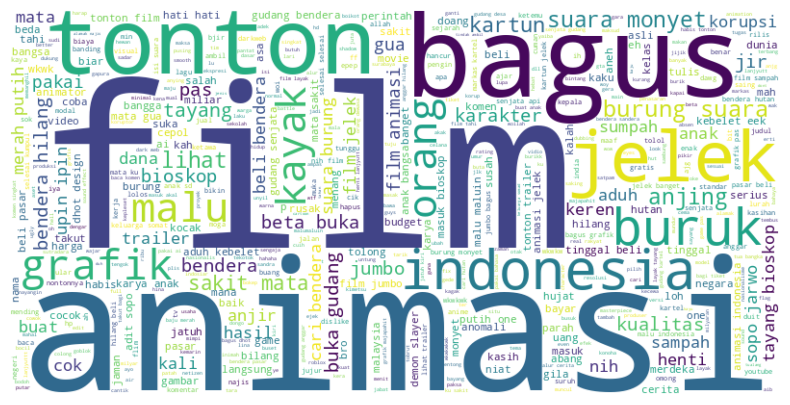

In [354]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


# Menggabungkan teks dari kolom 'steming_data'
text = ' '.join(df['stemming'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp','kak','deh','fyp', 'ya', 'gue', 'sih','yg','nya','aja','sdh','gak','ga','dm'])

wc = WordCloud(stopwords=stopwords, background_color="white", max_words=500, width=800, height=400)

wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

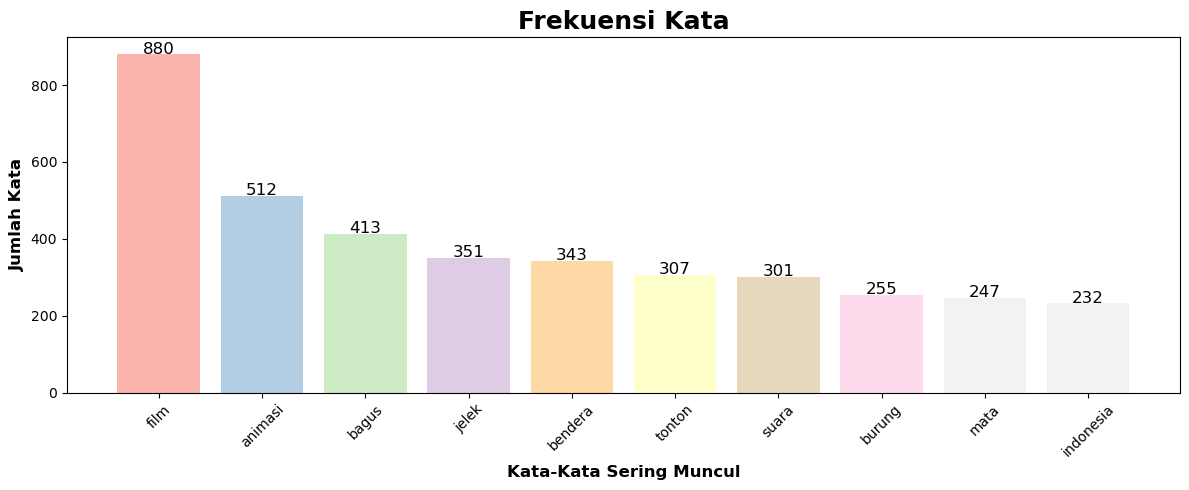

In [355]:
from collections import Counter
from wordcloud import STOPWORDS

all_text = ' '.join(df["stemming"].astype(str))
all_words = all_text.split()


stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp', 'kak', 'deh', 'fyp', 'ya', 'gue', 'sih', 'yg', 'nya', 'aja', 'sdh', 'gak', 'ga','dm'])

filtered_words = [word for word in all_words if word.lower() not in stopwords]
word_counts = Counter(filtered_words)
top_words = word_counts.most_common(10)
word, count = zip(*top_words)

colors = plt.cm.Pastel1(range(len(word)))

# Plot
plt.figure(figsize=(12, 5))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata-Kata Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi Kata", fontsize=18, fontweight='bold')
plt.xticks(rotation=45)

# Tampilkan jumlah di atas bar
for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2, num + 1, str(num), fontsize=12, color='black', ha='center')

plt.tight_layout()
plt.show()

In [356]:
df.to_csv('../data/Hasil_Preprocessing_Data.csv',encoding='utf8', index=False)

In [357]:
data = pd.read_csv('../data/Hasil_Preprocessing_Data.csv')

In [358]:
data.sample(10)

,tanggal,jam,username,komentarBaru,likeCount,case_folding,normalisasi,tokenize,stopword removal,stemming
163,2025-08-26,10:39:08,hannyssss,Duniya bukan maju malah mudur sama suaranya be...,1,duniya bukan maju malah mudur sama suaranya be...,duniya bukan maju malah mudur sama suaranya be...,"['duniya', 'bukan', 'maju', 'malah', 'mudur', ...","['duniya', 'maju', 'mudur', 'suaranya', 'beday...",duniya maju mudur suara bedaya burung suara mo...
3645,2025-08-15,03:09:07,somasja,Bikin kok gini,0,bikin kok gini,membuat kok begini,"['membuat', 'kok', 'begini']",[],NaN
65,2025-08-27,12:41:52,fitrirusdiana3840,kartel jir,0,kartel jir,kartel jir,"['kartel', 'jir']","['kartel', 'jir']",kartel jir
4380,2025-08-14,04:23:41,yotoyusup290,ini serius tayang di bioskopmalu sama upin ipi...,0,ini serius tayang di bioskopmalu sama upin ipi...,ini serius tayang di bioskopmalu sama upin ipi...,"['ini', 'serius', 'tayang', 'di', 'bioskopmalu...","['serius', 'tayang', 'bioskopmalu', 'upin', 'i...",serius tayang bioskopmalu upin ipin oii
1544,2025-08-19,06:54:38,farisghalib7695,Ooooo ini film Kirain tugas kelompok SMK,0,ooooo ini film kirain tugas kelompok smk,ooooo ini film mengira tugas kelompok smk,"['ooooo', 'ini', 'film', 'mengira', 'tugas', '...","['ooooo', 'film', 'tugas', 'kelompok', 'smk']",ooooo film tugas kelompok smk
2718,2025-08-16,14:48:27,mamiemka6021,NaN,0,NaN,NaN,[],[],NaN
3486,2025-08-15,08:56:39,vaelstromzy,pakai duit miliaran cuma untuk ini sybau,1,pakai duit miliaran cuma untuk ini sybau,pakai duit miliaran cuma untuk ini sybau,"['pakai', 'duit', 'miliaran', 'cuma', 'untuk',...","['pakai', 'duit', 'miliaran', 'sybau']",pakai duit miliar sybau
2294,2025-08-17,13:29:03,ratnasetiawati1640,Sybau,0,sybau,sybau,['sybau'],['sybau'],sybau
3707,2025-08-15,00:38:35,keepclickin.,Acara agustus di markas opm,2,acara agustus di markas opm,acara agustus di markas opm,"['acara', 'agustus', 'di', 'markas', 'opm']","['acara', 'agustus', 'markas', 'opm']",acara agustus markas opm
2811,2025-08-16,11:19:11,herdiansyahesc8667,Haduhhh,0,haduhhh,haduhhh,['haduhhh'],['haduhhh'],haduhhh


In [359]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4640 entries, 0 to 4639
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tanggal           4640 non-null   object
 1   jam               4640 non-null   object
 2   username          4640 non-null   object
 3   komentarBaru      4564 non-null   object
 4   likeCount         4640 non-null   int64 
 5   case_folding      4564 non-null   object
 6   normalisasi       4563 non-null   object
 7   tokenize          4640 non-null   object
 8   stopword removal  4640 non-null   object
 9   stemming          4514 non-null   object
dtypes: int64(1), object(9)
memory usage: 362.6+ KB


In [360]:
data.isna().sum()

tanggal               0
jam                   0
username              0
komentarBaru         76
likeCount             0
case_folding         76
normalisasi          77
tokenize              0
stopword removal      0
stemming            126
dtype: int64

In [361]:
data.dropna(inplace=True)

In [362]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4514 entries, 0 to 4638
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tanggal           4514 non-null   object
 1   jam               4514 non-null   object
 2   username          4514 non-null   object
 3   komentarBaru      4514 non-null   object
 4   likeCount         4514 non-null   int64 
 5   case_folding      4514 non-null   object
 6   normalisasi       4514 non-null   object
 7   tokenize          4514 non-null   object
 8   stopword removal  4514 non-null   object
 9   stemming          4514 non-null   object
dtypes: int64(1), object(9)
memory usage: 387.9+ KB


In [363]:
# Fungsi untuk menentukan sentimen
def determine_sentiment(text):
    positive_count = sum(1 for word in text.split() if word in positive_lexicon)
    negative_count = sum(1 for word in text.split() if word in negative_lexicon)
    if positive_count > negative_count:
        return "Positif"
    elif positive_count < negative_count:
        return "Negatif"

# Baca kamus leksikon positif dan negatif
positive_lexicon = set(pd.read_csv("../data/positive.tsv", sep="\t", header=None)[0])
negative_lexicon = set(pd.read_csv("../data/negative.tsv", sep="\t", header=None)[0])

def replace_none_sentiment(sentiments):
    replace_flag = "Positif"
    for i in range(len(sentiments)):
        if sentiments[i] is None:
            sentiments[i] = replace_flag
            replace_flag = "Negatif" if replace_flag == "Positif" else "Positif"
    return sentiments

data['sentiment'] = data['stemming'].apply(determine_sentiment)
data['sentiment'] = replace_none_sentiment(data['sentiment'].tolist())

In [364]:
data

,tanggal,jam,username,komentarBaru,likeCount,case_folding,normalisasi,tokenize,stopword removal,stemming,sentiment
0,2025-08-28,08:45:34,syafeqah1990,Cartoon ni masuk pawagam,0,cartoon ni masuk pawagam,cartoon ini masuk pawagam,"['cartoon', 'ini', 'masuk', 'pawagam']","['cartoon', 'masuk', 'pawagam']",cartoon masuk pawagam,Negatif
1,2025-08-28,08:29:35,husnanurul-m6h,ini yg katanya film mengeluarkan dan sampe mil...,0,ini yg katanya film mengeluarkan dan sampe mil...,ini yang katanya film mengeluarkan dan sampai ...,"['ini', 'yang', 'katanya', 'film', 'mengeluark...","['film', 'mengeluarkan', 'miliyaran', 'film', ...",film keluar miliyaran film game android karakt...,Negatif
2,2025-08-28,08:14:10,alvinoawp,Burung nya suara monyet cok,0,burung nya suara monyet cok,burung nya suara monyet cok,"['burung', 'nya', 'suara', 'monyet', 'cok']","['burung', 'nya', 'suara', 'monyet', 'cok']",burung nya suara monyet cok,Negatif
3,2025-08-28,07:56:15,arkanpradipta8934,apalah ada AMK M,0,apalah ada amk m,apalah ada amk sama,"['apalah', 'ada', 'amk', 'sama']","['apalah', 'amk']",apa amk,Negatif
4,2025-08-28,07:50:36,galangadimaskhrisnaherlamb4053,bahkan jurasik park lebih bagus dari ini,1,bahkan jurasik park lebih bagus dari ini,bahkan jurasik park lebih bagus dari ini,"['bahkan', 'jurasik', 'park', 'lebih', 'bagus'...","['jurasik', 'park', 'bagus']",jurasik park bagus,Positif
...,...,...,...,...,...,...,...,...,...,...,...
4634,2025-08-09,12:20:23,justanord1naryman,Dari pemerintah bro membangkang auto hilang,13,dari pemerintah bro membangkang auto hilang,dari pemerintah bro membangkang auto hilang,"['dari', 'pemerintah', 'bro', 'membangkang', '...","['pemerintah', 'bro', 'membangkang', 'auto', '...",perintah bro bangkang auto hilang,Negatif
4635,2025-08-11,08:57:24,prod.starlight,JustAnOrd naryMankok XXI gaada trailer sih Gam...,6,justanord narymankok xxi gaada trailer sih gam...,justanord narymankok xxi trailer sih gamasuk x...,"['justanord', 'narymankok', 'xxi', 'trailer', ...","['justanord', 'narymankok', 'xxi', 'trailer', ...",justanord narymankok xxi trailer sih gamasuk x...,Positif
4636,2025-08-15,09:15:28,dikaalvin657,Kalau fulusPasti mulus,2,kalau fuluspasti mulus,kalau fuluspasti mulus,"['kalau', 'fuluspasti', 'mulus']","['fuluspasti', 'mulus']",fuluspasti mulus,Positif
4637,2025-08-15,23:23:43,matthewbrealey2026,prod starlight masuk di XXI loh,0,prod starlight masuk di xxi loh,prod starlight masuk di xxi loh,"['prod', 'starlight', 'masuk', 'di', 'xxi', 'l...","['prod', 'starlight', 'masuk', 'xxi', 'loh']",prod starlight masuk xxi loh,Negatif


In [365]:
data['sentiment'].value_counts()

sentiment
Negatif    3050
Positif    1464
Name: count, dtype: int64

In [366]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold, cross_val_score, RandomizedSearchCV

x = data['stemming']
y = data['sentiment']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

In [367]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [368]:
y_test.value_counts()

sentiment
Negatif    610
Positif    293
Name: count, dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report, precision_recall_curve
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB

In [370]:
vectorizer = TfidfVectorizer()
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

In [371]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_vectorized, y_train = smote.fit_resample(x_train_vectorized, y_train)

In [372]:
y_train.value_counts()

sentiment
Negatif    2440
Positif    2440
Name: count, dtype: int64

In [373]:
print('matriks vektorisasi untuk data train')
print(x_train_vectorized.toarray())

matriks vektorisasi untuk data train
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [374]:
classifier = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100),
    "SVM": SVC(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5,metric='euclidean'),
    "Multinomial NB": MultinomialNB(),
    "Complement NB": ComplementNB()
    
}

In [375]:
n_classifiers = len(classifier)

for index, (name, classifier) in enumerate(classifier.items()):

    classifier.fit(x_train_vectorized, np.ravel(y_train))
    cv_score = cross_val_score(classifier, x_train_vectorized, y_train, cv=kf, scoring='accuracy')
    y_pred = classifier.predict(x_test_vectorized)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'performance pada masing-masing bagian : {cv_score}')
    print(f"accuracy (train) for : {name, accuracy*100}")
    print(classification_report(y_test, y_pred))

performance pada masing-masing bagian : [0.79815574 0.78688525 0.78893443 0.78790984 0.80942623]
accuracy (train) for : ('Decision Tree', 74.52934662236987)
              precision    recall  f1-score   support

     Negatif       0.79      0.84      0.82       610
     Positif       0.62      0.54      0.58       293

    accuracy                           0.75       903
   macro avg       0.71      0.69      0.70       903
weighted avg       0.74      0.75      0.74       903

performance pada masing-masing bagian : [0.82889344 0.82479508 0.81762295 0.82377049 0.84118852]
accuracy (train) for : ('Logistic Regression', 75.96899224806202)
              precision    recall  f1-score   support

     Negatif       0.85      0.79      0.82       610
     Positif       0.61      0.70      0.65       293

    accuracy                           0.76       903
   macro avg       0.73      0.74      0.73       903
weighted avg       0.77      0.76      0.76       903

performance pada masing-ma

In [376]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('model', None)  # Placeholder untuk model
])

# buat list of dictionary untuk memuat beberapa model
param_grid = [
    {
        'model': [KNeighborsClassifier()],
        'model__n_neighbors': [3, 5, 7, 9],
        'model__weights': ['uniform', 'distance'],
        'model__p': [1, 2]
    },
    {
        'model': [SVC()],
        'model__C': [0.1, 1, 10, 100],
        'model__kernel': ['linear', 'rbf'],
        'model__gamma': ['scale', 'auto']
    },
    {
        'model': [RandomForestClassifier(random_state=42)],
        'model__n_estimators': [100, 200, 300],
        'model__max_depth': [10, 20, 30, None],
        'model__min_samples_split': [2, 5, 10]
    },
    {
        'model': [LogisticRegression(max_iter=100, random_state=42)],
        'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'model__penalty': ['l1', 'l2']
    },
    {
        'model': [MultinomialNB()],
        'model__alpha': [0.1, 0.5, 1.0],      # smoothing
        'model__fit_prior': [True, False]
    },
    {
        'model': [ComplementNB()],
        'model__alpha': [0.1, 0.5, 1.0],
        'model__fit_prior': [True, False],
        # (opsional) 'model__norm': [True, False]
    }
]



In [377]:
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

In [378]:
grid_search.fit(x_train_vectorized, y_train)

Fitting 5 folds for each of 92 candidates, totalling 460 fits


GridSearchCV(cv=5, estimator=Pipeline(steps=[('model', None)]), n_jobs=-1,
             param_grid=[{'model': [KNeighborsClassifier()],
                          'model__n_neighbors': [3, 5, 7, 9],
                          'model__p': [1, 2],
                          'model__weights': ['uniform', 'distance']},
                         {'model': [SVC()], 'model__C': [0.1, 1, 10, 100],
                          'model__gamma': ['scale', 'auto'],
                          'model__kernel': ['linear', 'rbf']},
                         {'model': [RandomForestClassifier(ra...
                          'model__n_estimators': [100, 200, 300]},
                         {'model': [LogisticRegression(random_state=42)],
                          'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'model__penalty': ['l1', 'l2']},
                         {'model': [MultinomialNB()],
                          'model__alpha': [0.1, 0.5, 1.0],
                          'model__fit_prior': [True, False]},
                         {'model': [ComplementNB()],
                          'model__alpha': [0.1, 0.5, 1.0],
                          'model__fit_prior': [True, False]}],
             scoring='accuracy', verbose=1)

In [379]:
y_pred_gscv = grid_search.predict(x_test_vectorized)

In [380]:
print(accuracy_score(y_test, y_pred_gscv))
print(classification_report(y_test, y_pred_gscv))

0.7774086378737541
              precision    recall  f1-score   support

     Negatif       0.82      0.86      0.84       610
     Positif       0.67      0.61      0.64       293

    accuracy                           0.78       903
   macro avg       0.75      0.73      0.74       903
weighted avg       0.77      0.78      0.77       903



In [381]:
randomized_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    n_iter=50,  # Jumlah kombinasi hyperparameter yang akan diuji
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

In [382]:
randomized_search.fit(x_train_vectorized, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=Pipeline(steps=[('model', None)]), n_iter=50,
                   n_jobs=-1,
                   param_distributions=[{'model': [KNeighborsClassifier()],
                                         'model__n_neighbors': [3, 5, 7, 9],
                                         'model__p': [1, 2],
                                         'model__weights': ['uniform',
                                                            'distance']},
                                        {'model': [SVC()],
                                         'model__C': [0.1, 1, 10, 100],
                                         'model__gamma': ['scale', 'auto'],
                                         'model__kernel': ['linear', 'rbf']},
                                        {'model': [...
                                         'model__n_estimators': [100, 200,
                                                                 300]},
                                        {'model': [LogisticRegression(random_state=42)],
                                         'model__C': [0.001, 0.01, 0.1, 1, 10,
                                                      100],
                                         'model__penalty': ['l1', 'l2']},
                                        {'model': [MultinomialNB()],
                                         'model__alpha': [0.1, 0.5, 1.0],
                                         'model__fit_prior': [True, False]},
                                        {'model': [ComplementNB()],
                                         'model__alpha': [0.1, 0.5, 1.0],
                                         'model__fit_prior': [True, False]}],
                   random_state=42, scoring='accuracy', verbose=1)

In [383]:
y_pred_rscv = randomized_search.predict(x_test_vectorized)

In [385]:
print(accuracy_score(y_test, y_pred_rscv))
print(classification_report(y_test, y_pred_rscv))

0.7774086378737541
              precision    recall  f1-score   support

     Negatif       0.82      0.86      0.84       610
     Positif       0.67      0.61      0.64       293

    accuracy                           0.78       903
   macro avg       0.75      0.73      0.74       903
weighted avg       0.77      0.78      0.77       903



In [387]:
import joblib

joblib.dump((randomized_search, y), '../model/sentiment_model.pkl')

['../model/sentiment_model.pkl']